### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [2]:
matrix = np.load('/mnt/files/matrix.npy')

### Result Shapes

In [3]:
matrix.shape

(95458, 1226)

### Slicing consider similar objects

In [4]:
row_idx = np.array([1,2,7,14,15,16,27,44,46,57,67,69,70,83,84,85,88,100,101,131,134,135,139,147,151,152,153,154,160,161,165,168,184,206,207,208,209,210,211,212,214,215,216,217,246,247,256,337,341,342,343,344,348,354,361,375,384,388,391,392,397,417,418,419,441,444,450,478,488,495,499,504,516,517,529,546,561,562,563,595,606,617,622,623,624,625,634,637,642,643,647,656,658,661,663,665,680,683,693,706,710,713,716,717,718,719,720,721,722,728,738,744,745,751,758,759,760,761,762,763,764,765,766,767,768,770,771,772,773,774,775,776,778,779,781,782,783,785,786,787,788,789,790,791,792,793,795,796,797,799,800,802,803,804,806,807,808,809,810,813,816,817,818,819,820,821,822,824,825,826,827,828,829,830,831,833,834,835,837,838,839,840,841,842,843,845,849,850,851,852,853,854,855,856,857,858,859,860,872,896,897,904,905,906,907,912,917,919,957,958,959,961,972,973,981,997,1005,1009,1014,1023,1029,1030,1031,1038,1039,1040,1044,1050,1051,1063,1066,1070,1071,1072,1085,1101,1103,1105,1116,1118,1154,1160,1161,1162,1163,1167,1175,1181,1187,1191,1206,1321,1455,1605,1607,1696,1705,2023,2200,2362,2367,2385,2387,2397,2398,2410,2425,2428,2432,2435,2438,2463,2465,2466,2467,2482,2483,2488,2489,2491,2492,2493,2510,2514,2534,2544,2555,2585,2606,2610,2615,2634,2643,2652,2659,2660,2690,2761,2762,2763,2793,2811,2817,2820,2836,2837,2850,2853,2857,2858,2881,2882,2924,2925,2940,2941,2948,2952,2974,2976,3019,3022,3038,3040,3058,3064,3074,3075,3077,3078,3082,3096,3110,3112,3122,3127,3143,3168,3169,3171,3172,3178,3183,3184,3205,3211,3212,3213,3214,3239,3276,3277,3300,3315,3325,3326,3350,3364,3365,3370,3376,3386,3390,3399,3405,3406,3407,3408,3411,3412,3413,3415,3456,3457,3465,3467,3468,3469,3474,3534,3544,3549,3551,3555,3604,3607,3611,3652,3653,3655,3661,3662,3668,3671,3678,3683,3686,3687,3688,3689,3717,3721,3807,3811,3816,3825,3879,3882,3886,3896,3897,3910,3923,3927,3928,3929,3941,3956,3958,3962,3966,4005,4009,4017,4046,4047,4048,4049,4051,4052,4054,4062,4071,4073,4075,4078,4088,4089,4099,4107,4116,4118,4119,4125,4129,4130,4131,4132,4141,4146,4156,4157,4162,4167,4168,4175,4181,4190,4191,4192,4228,4268,4269,4273,4274,4277,4281,4297,4310,4312,4320,4324,4327,4342,4348,4352,4356,4359,4361,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371,4372,4378,4390,4391,4392,4393,4412,4416,4422,4423,4424,4437,4438,4469,4471,4473,4478,4485,4487,4500,4501,4502,4512,4520,4525,4530,4531,4561,4562,4573,4576,4588,4596,4597,4600,4604,4605,4622,4629,4631,4638,4642,4663,4675,4676,4684,4689,4693,4695,4698,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721,4722,4723,4724,4725,4726,4727,4728,4729,4730,4731,4732,4733,4734,4735,4736,4737,4738,4739,4740,4741,4742,4743,4744,4745,4746,4747,4748,4749,4750,4751,4752,4753,4754,4755,4756,4757,4758,4759,4760,4761,4762,4763,4764,4772,4773,4776,4781,4784,4798,4851,4868,4878,4895,4899,4917,4922,5017,5153,5154,5174,5202,5218,5220,5221,5222,5223,5224,5225,5227,5228,5229,5231,5232,5233,5234,5235,5236,5237,5238,5239,5240,5241,5242,5243,5244,5245,5246,5247,5248,5249,5250,5251,5252,5253,5254,5255,5258,5299,5300,5301,5321,5324,5327,5329,5341,5373,5374,5375,5376,5385,5391,5406,5436,5445,5446,5457,5461,5468,5478,5481,5489,5490,5491,5492,5493,5494,5498,5499,5506,5512,5521,5522,5527,5528,5542,5546,5558,5559,5562,5564,5565,5567,5569,5570,5579,5605,5608,5609,5610,5620,5621,5624,5625,5626,5649,5652,5653,5654,5656,5705,5724,5775,5778,5779,5794,5795,5802,5803,5804,5817,5847,5848,5853,5861,5866,5873,5879,5888,5890,5896,5932,5941,5959,5988,5989,5991,5994,5995,5997,5998,5999,6020,6021,6034,6041,6045,6048,6049,6066,6089,6091,6093,6096,6123,6134,6144,6145,6153,6155,6157,6168,6173,6182,6187,6195,6201,6203,6244,6258,6259,6273,6274,6298,6301,6305,6322,6323,6344,6350,6351,6353,6354,6355,6364,6376,6408,6434,6444,6456,6457,6458,6459,6487,6496,6498,6501,6502,6513,6514,6516,6528,6529,6543,6579,6587,6591,6592,6595,6596,6597,6606,6610,6611,6612,6614,6623,6666,6667,6668,6669,6674,6683,6685,6689,6690,6691,6692,6693,6694,6695,6715,6716,6721,6724,6726,6727,6728,6729,6755,6771,6783,6794,6840,6847,6848,6851,6873,6874,6875,6876,6878,6880,6900,6911,6932,6935,6947,6987,6996,7006,7012,7017,7018,7035,7072,7075,7082,7084,7090,7092,7093,7100,7164,7165,7166,7167,7182,7233,7238,7240,7241,7242,7246,7259,7260,7273,7292,7294,7297,7298,7317,7327,7329,7332,7333,7334,7335,7338,7340,7379,7384,7385,7402,7403,7412,7452,7464,7466,7467,7479,7489,7499,7500,7501,7502,7503,7504,7505,7506,7520,7521,7527,7530,7556,7559,7566,7573,7574,7591,7592,7603,7606,7607,7623,7636,7648,7650,7658,7660,7665,7672,7678,7710,7730,7734,7735,7736,7749,7750,7781,7785,7788,7803,7808,7810,7819,7820,7824,7825,7826,7841,7849,7859,7884,7887,7891,7892,7893,7899,7901,7904,7918,7922,7923,7937,7939,7972,7990,8004,8012,8016,8020,8029,8031,8043,8089,8099,8126,8140,8142,8147,8148,8154,8156,8161,8162,8168,8172,8173,8189,8215,8249,8250,8251,8252,8253,8254,8255,8256,8287,8289,8290,8294,8298,8302,8309,8317,8324,8325,8356,8372,8374,8386,8387,8389,8392,8413,8419,8420,8468,8481,8482,8485,8487,8488,8525,8526,8527,8528,8529,8530,8531,8532,8533,8534,8535,8536,8537,8538,8539,8540,8541,8542,8543,8544,8545,8546,8547,8553,8556,8557,8559,8564,8572,8574,8575,8576,8577,8578,8579,8580,8581,8582,8583,8584,8585,8586,8587,8588,8589,8590,8596,8602,8610,8630,8631,8649,8650,8651,8654,8655,8656,8662,8670,8678,8688,8703,8707,8741,8753,8761,8769,8782,8787,8788,8793,8827,8844,8847,8848,8849,8850,8851,8852,8853,8884,8885,8909,8915,8918,8927,8929,8935,8937,8939,8940,8942,8943,8944,8946,8948,8949,8950,8951,8954,8961,8985,9004,9012,9035,9067,9071,9081,9082,9089,9107,9118,9130,9134,9154,9155,9225,9248,9250,9265,9269,9271,9272,9283,9286,9287,9289,9299,9303,9307,9308,9318,9319,9332,9333,9361,9377,9409,9420,9422,9423,9439,9440,9448,9573,9574,9711,9712,9718,9719,9720,9721,9722,9723,9724,9725,9726,9727,9728,9729,9730,9731,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741,9742,9743,9744,9745,9746,9747,9748,9749,9750,9751,9752,9753,9754,9758,9763,9766,9768,9770,9773,9777,9778,9794,9795,9802,9809,9821,9824,9833,9835,9836,9840,9842,9892,9923,9924,9925,9928,9929,9936,9938,9941,9955,9958,9961,9965,9968,9974,9983,9984,9985,9992,10005,10030,10033,10037,10046,10052,10062,10079,10080,10084,10085,10088,10089,10121,10122,10124,10125,10155,10156,10157,10158,10174,10186,10187,10188,10189,10190,10191,10192,10193,10194,10195,10196,10197,10198,10199,10200,10201,10202,10203,10205,10206,10207,10208,10209,10221,10244,10246,10251,10253,10254,10273,10277,10278,10281,10286,10287,10311,10313,10318,10335,10336,10338,10365,10367,10376,10384,10397,10404,10405,10409,10414,10417,10426,10433,10439,10440,10447,10455,10457,10458,10462,10469,10470,10479,10491,10492,10516,10520,10526,10530,10531,10544,10545,10546,10556,10557,10558,10559,10572,10574,10575,10577,10580,10582,10584,10589,10590,10591,10598,10605,10620,10628,10629,10638,10641,10651,10653,10654,10655,10656,10657,10671,10677,10688,10691,10702,10703,10711,10715,10716,10725,10726,10727,10739,10798,10799,10805,10806,10807,10808,10810,10811,10812,10813,10815,10856,10872,10875,10879,10887,10904,10905,10911,10914,10938,10973,10976,10977,10979,10980,10982,10984,10985,10987,10988,10990,10992,10993,10994,10995,10997,10998,11000,11001,11002,11005,11006,11008,11052,11053,11054,11055,11056,11063,11064,11073,11081,11084,11117,11133,11134,11135,11142,11143,11146,11153,11155,11173,11176,11194,11201,11219,11225,11260,11264,11266,11267,11269,11279,11280,11292,11294,11296,11298,11299,11307,11324,11327,11331,11334,11335,11347,11349,11366,11367,11378,11379,11380,11391,11392,11398,11403,11404,11405,11418,11419,11420,11421,11422,11423,11424,11425,11427,11430,11438,11439,11442,11445,11447,11453,11454,11462,11475,11477,11502,11503,11504,11505,11506,11507,11508,11522,11526,11531,11540,11542,11547,11574,11579,11596,11597,11600,11601,11603,11609,11610,11612,11621,11622,11648,11699,11700,11701,11707,11728,11734,11738,11740,11765,11766,11784,11787,11840,11849,11851,11853,11854,11866,11872,11889,11904,11905,11923,11931,11933,11937,11946,11949,11952,11955,11957,11959,11967,11969,11973,11981,11996,12001,12002,12006,12010,12015,12021,12026,12029,12034,12038,12054,12056,12057,12065,12071,12086,12097,13111,13116,13117,13121,13124,13125,13127,13132,13134,13139,13141,13143,13186,13191,13192,13348,13355,13365,13401,13405,13411,13413,13432,13457,13458,13459,13460,13461,13467,13471,13488,13509,13513,13565,13569,13570,13573,13575,13577,13578,13579,13580,13581,13582,13583,13584,13597,13603,13604,13605,13606,13629,13631,13840,13859,13891,13893,13894,13895,13903,13904,13905,13906,13907,13908,13909,13910,13914,13920,13921,13922,13943,13944,13945,13946,13950,13996,13997,13998,13999,14000,14001,14003,14004,14005,14007,14035,14041,14043,14044,14045,14047,14058,14059,14060,14061,14062,14063,14071,14188,14189,14190,14191,14223,14224,14267,14315,14329,14331,14397,14398,14402,14416,14427,14428,14429,14430,14431,14432,14433,14435,14439,14446,14447,14451,14452,14457,14461,14470,14473,14474,14490,14491,14511,14517,14566,14570,14576,14577,14588,14593,14596,14607,14622,14636,14637,14638,14639,14640,14641,14642,14645,14646,14676,14681,14683,14684,14690,14693,14694,14695,14716,14717,14718,14719,14725,14728,14731,14740,14762,14763,14765,14768,14780,14790,14792,14795,14799,14805,14808,14814,14815,14824,14857,14862,14865,14884,14896,14908,14914,14920,14931,14935,14936,14937,14942,14943,14949,14950,14974,14985,14989,14990,14991,14992,14996,14998,15018,15029,15030,15031,15032,15033,15034,15035,15036,15037,15038,15039,15040,15043,15053,15055,15056,15057,15058,15066,15094,15096,15101,15102,15103,15104,15183,15185,15187,15188,15189,15190,15191,15192,15193,15194,15195,15196,15198,15199,15200,15201,15202,15203,15216,15217,15218,15219,15230,15237,15261,15288,15291,15325,15337,15622,15625,15631,15632,15643,15647,15648,15655,15703,15707,15715,15722,15725,15726,15727,15738,15739,15766,15788,15802,15803,15804,15811,15818,15826,15830,15833,15834,15835,15857,15860,15861,15863,15864,15873,15874,15876,15877,15879,15880,15884,15885,15886,15923,15936,15937,15940,15950,15979,15981,15983,15984,15991,15993,15995,16014,16023,16028,16045,16053,16055,16060,16081,16082,16085,16125,16187,16226,16238,16255,16261,16265,16278,16283,16284,16285,16289,16290,16292,16293,16373,16396,16397,16398,16399,16403,16405,16406,16407,16419,16428,16444,16479,16480,16482,16483,16492,16502,16511,16522,16528,16531,16557,16568,16593,16596,16606,16611,16613,16614,16615,16616,16617,16618,16619,16620,16621,16633,16637,16657,16658,16661,16667,16679,16702,16703,16704,16705,16708,16709,16710,16711,16712,16713,16714,16715,16717,16718,16720,16721,16727,16735,16739,16740,16741,16782,16783,16784,16824,16825,16829,16832,16837,16846,16865,16866,16871,16891,16939,16956,17011,17108,17133,17134,17144,17151,17161,17177,17179,17199,17201,17212,17213,17219,17220,17224,17229,17247,17248,17267,17284,17333,17337,17344,17375,17376,17382,17392,17393,17396,17397,17398,17399,17407,17408,17431,17464,17469,17470,17471,17479,17480,17484,17496,17497,17498,17512,17513,17516,17517,17532,17533,17534,17542,17549,17554,17574,17577,17581,17586,17587,17589,17645,17650,17651,17653,17718,17738,17739,17740,17742,17757,17758,17760,17773,17779,17781,17782,17786,17787,17793,17794,17795,17796,17808,17827,17829,17835,17836,17867,17885,17898,17899,17922,17927,17928,17938,17943,17947,17953,17955,17965,17966,17980,17982,18005,18022,18042,18054,18055,18061,18064,18068,18069,18070,18076,18078,18079,18080,18092,18093,18102,18104,18105,18107,18112,18115,18117,18148,18149,18150,18151,18152,18162,18167,18179,18189,18190,18200,18209,18211,18212,18215,18244,18253,18256,18257,18259,18260,18261,18262,18263,18264,18265,18266,18267,18268,18269,18270,18271,18272,18281,18284,18423,18432,18449,18456,18474,18479,18486,18498,18499,18500,18511,18512,18513,18514,18515,18516,18517,18518,18519,18522,18532,18540,18556,18557,18558,18571,18575,18589,18592,18594,18627,18646,18647,18653,18665,18668,18669,18677,18681,18685,18690,18692,18720,18739,18741,18742,18743,18747,18766,18767,18768,18786,18798,18830,18831,18836,18841,18844,18846,18852,18858,18859,18860,18861,18862,18885,18886,18891,18893,18894,18895,18897,18898,18901,18914,18950,18952,18965,18969,18982,18993,18995,19001,19009,19010,19020,19021,19030,19032,19035,19057,19058,19061,19109,19130,19131,19132,19134,19135,19136,19140,19141,19142,19143,19144,19145,19146,19148,19149,19150,19162,19168,19169,19171,19204,19210,19211,19219,19224,19225,19226,19227,19228,19229,19230,19231,19232,19233,19234,19235,19236,19237,19238,19239,19240,19241,19242,19243,19244,19245,19246,19247,19248,19249,19250,19251,19252,19253,19254,19255,19256,19257,19258,19259,19260,19261,19262,19263,19264,19265,19266,19267,19268,19269,19270,19271,19272,19273,19274,19275,19276,19277,19278,19279,19280,19281,19282,19283,19284,19285,19286,19287,19288,19289,19290,19291,19292,19293,19294,19295,19296,19297,19298,19299,19300,19301,19302,19303,19304,19305,19306,19307,19308,19309,19310,19311,19312,19313,19314,19315,19316,19317,19318,19319,19320,19321,19322,19323,19324,19325,19326,19327,19328,19329,19330,19331,19332,19333,19334,19335,19336,19337,19338,19339,19340,19341,19342,19343,19344,19345,19346,19347,19348,19349,19350,19351,19352,19353,19354,19355,19356,19357,19358,19359,19360,19361,19362,19363,19364,19365,19366,19367,19368,19369,19370,19371,19372,19373,19374,19375,19376,19377,19378,19379,19380,19381,19382,19383,19384,19385,19386,19387,19388,19389,19390,19391,19392,19393,19394,19395,19396,19397,19398,19399,19400,19401,19402,19403,19404,19405,19406,19407,19408,19409,19410,19411,19412,19413,19414,19415,19416,19417,19418,19419,19420,19421,19422,19423,19424,19425,19426,19427,19428,19429,19430,19431,19432,19433,19434,19435,19436,19437,19438,19439,19440,19441,19442,19443,19444,19445,19446,19447,19448,19449,19460,19481,19487,19489,19499,19517,19525,19547,19553,19558,19559,19571,19575,19586,19590,19601,19614,19616,19617,19618,19638,19660,19661,19662,19663,19664,19665,19666,19667,19668,19669,19683,19714,19715,19716,19717,19744,19759,19777,19786,19803,19816,19817,19818,19819,19820,19821,19822,19823,19824,19825,19826,19827,19832,19833,19834,19836,19837,19846,19852,19857,19875,19877,19882,19932,19933,20014,20015,20016,20032,20036,20037,20038,20039,20045,20046,20047,20048,20049,20050,20051,20052,20053,20054,20055,20056,20057,20058,20059,20060,20061,20062,20063,20064,20065,20066,20067,20068,20069,20070,20071,20072,20073,20074,20075,20076,20077,20078,20079,20080,20081,20082,20083,20084,20085,20086,20087,20088,20089,20090,20091,20092,20093,20094,20095,20096,20097,20098,20099,20100,20101,20102,20103,20104,20105,20106,20107,20108,20109,20110,20111,20112,20113,20114,20115,20116,20117,20137,20138,20140,20141,20149,20153,20159,20161,20162,20163,20183,20189,20198,20221,20226,20244,20263,20266,20268,20272,20278,20282,20301,20338,20340,20354,20358,20376,20380,20382,20383,20384,20388,20416,20419,20427,20432,20434,20473,20494,20495,20507,20528,20529,20530,20535,20557,20576,20583,20587,20589,20630,20633,20634,20642,20649,20697,20715,20721,20723,20730,20735,20736,20738,20753,20759,20760,20766,20789,20799,20819,20841,20844,20853,20858,20859,20905,20928,20929,20939,20944,20970,20971,20974,20981,20988,20991,20993,20997,21001,21002,21007,21008,21013,21043,21047,21059,21067,21072,21073,21083,21084,21085,21086,21087,21088,21089,21090,21091,21092,21093,21094,21095,21096,21097,21098,21099,21108,21109,21117,21118,21120,21121,21124,21153,21159,21160,21161,21162,21172,21193,21202,21213,21223,21224,21239,21240,21241,21244,21245,21263,21313,21316,21319,21330,21404,21426,21427,21431,21441,21442,21443,21444,21451,21461,21474,21522,21762,21763,21765,21775,21776,21779,21792,21800,21806,21827,21828,21829,21830,21831,21835,21855,21856,21857,21858,21859,21860,21862,21863,21869,21893,21904,21908,21909,21910,21911,21912,21913,21914,21944,21971,22256,22266,22269,22273,22275,22287,22288,22371,22374,22376,22381,22382,22385,22410,22411,22412,22413,22414,22415,22418,22419,22420,22421,22422,22423,22424,22425,22426,22428,22429,22440,22443,22447,22448,22449,22450,22451,22452,22453,22455,22459,22471,22472,22477,22480,22482,22494,22498,22500,22502,22503,22504,22541,22543,22544,22546,22549,22550,22551,22552,22559,22560,22591,22601,22608,22612,22637,22640,22644,22645,22646,22659,22662,22698,22706,22709,22710,22711,22713,22716,22717,22719,22723,22724,22725,22726,22727,22728,22729,22730,22731,22732,22733,22734,22735,22736,22737,22738,22739,22740,22751,22794,22799,22802,22807,22822,22823,22824,22832,22845,22847,22848,22856,22862,22913,22916,22917,22919,22942,22943,22944,22945,22948,22949,22958,22960,22968,22971,22972,22974,22983,22984,22989,22990,22991,22992,22993,22994,22995,22996,22997,22998,22999,23000,23001,23002,23003,23004,23005,23006,23012,23013,23015,23053,23055,23063,23064,23066,23067,23068,23070,23071,23090,23093,23105,23120,23122,23139,23153,23156,23157,23159,23279,23280,23295,23302,23304,23305,23322,23337,23338,23346,23350,23362,23363,23366,23367,23368,23369,23376,23395,23408,23437,23440,23456,23457,23463,23464,23524,23533,23538,23543,23544,23545,23546,23572,23576,23589,23593,23598,23601,23614,23615,23627,23633,23637,23643,23650,23651,23672,23673,23676,23678,23679,23702,23707,23714,23761,23762,23763,23766,23815,23821,23824,23825,23826,23833,23847,23848,23850,23868,23874,23954,23976,23986,23990,23994,23999,24011,24023,24027,24030,24033,24035,24036,24076,24077,24079,24081,24086,24090,24115,24121,24125,24126,24127,24149,24150,24151,24152,24153,24154,24155,24156,24161,24167,24170,24171,24182,24187,24190,24192,24202,24206,24212,24213,24215,24216,24218,24219,24221,24222,24223,24224,24225,24228,24229,24255,24257,24263,24265,24266,24272,24273,24274,24283,24288,24291,24292,24314,24347,24357,24358,24359,24361,24370,24373,24374,24375,24376,24378,24379,24383,24389,24398,24410,24427,24438,24463,24470,24477,24495,24503,24505,24508,24520,24529,24539,24557,24575,24594,24600,24607,24609,24616,24636,24671,24673,24674,24676,24677,24681,24708,24713,24720,24725,24729,24752,24760,24761,24762,24766,24771,24781,24782,24784,24870,24871,24879,24880,24881,24883,24915,24916,24921,24922,24938,24952,24956,24969,24970,24981,24986,24991,25005,25008,25009,25015,25017,25023,25028,25029,25040,25061,25062,25063,25064,25067,25070,25073,25092,25094,25122,25353,25364,25371,25372,25373,25374,25375,25378,25381,25384,25395,25405,25406,25407,25417,25431,25435,25438,25449,25451,25452,25466,25501,25514,25525,25532,25536,25538,25544,25556,25572,25580,25585,25586,25589,25621,25643,25644,25651,25653,25665,25666,25667,25668,25705,25706,25722,25725,25726,25732,25734,25737,25744,25749,25750,25766,25807,25841,25848,25858,25859,25863,25869,25896,25924,25925,25939,25948,25950,25951,25968,25979,25984,25987,25988,25999,26017,26019,26029,26032,26033,26034,26035,26036,26037,26038,26041,26047,26048,26059,26061,26068,26075,26076,26079,26089,26098,26099,26109,26122,26123,26131,26134,26135,26159,26181,26187,26215,26226,26262,26264,26271,26272,26346,26351,26352,26381,26397,26398,26400,26428,26431,26442,26443,26444,26445,26448,26459,26462,26463,26464,26465,26466,26467,26468,26469,26470,26471,26472,26473,26474,26475,26476,26477,26478,26479,26480,26481,26482,26483,26484,26485,26486,26487,26488,26497,26503,26505,26529,26530,26571,26572,26573,26574,26575,26576,26577,26578,26579,26580,26581,26582,26583,26584,26585,26586,26587,26588,26589,26599,26600,26610,26619,26621,26623,26642,26644,26645,26647,26677,26699,26701,26702,26703,26704,26705,26706,26707,26720,26721,26723,26725,26727,26756,26795,26796,26823,26827,26875,26882,26913,26923,26924,26929,26971,26979,26984,26985,26986,26987,26988,26989,26995,27007,27009,27013,27014,27016,27025,27033,27045,27048,27051,27054,27060,27061,27062,27063,27064,27065,27066,27067,27068,27069,27070,27071,27072,27073,27074,27075,27076,27077,27078,27079,27080,27081,27082,27083,27084,27085,27086,27087,27088,27089,27090,27091,27092,27093,27094,27095,27096,27097,27098,27099,27100,27101,27102,27103,27104,27105,27106,27107,27108,27109,27110,27111,27112,27113,27114,27115,27116,27117,27118,27119,27120,27121,27122,27123,27124,27125,27126,27127,27128,27129,27130,27131,27132,27133,27134,27135,27136,27137,27138,27139,27140,27141,27142,27143,27144,27145,27146,27147,27148,27149,27150,27151,27152,27153,27154,27155,27156,27157,27158,27159,27160,27161,27162,27163,27164,27165,27166,27167,27168,27169,27170,27171,27172,27173,27174,27175,27176,27177,27178,27179,27180,27181,27182,27183,27184,27185,27186,27187,27188,27189,27190,27191,27192,27193,27194,27195,27196,27197,27198,27199,27200,27201,27202,27203,27204,27205,27206,27207,27208,27209,27210,27211,27212,27213,27214,27215,27216,27217,27218,27219,27220,27221,27222,27223,27224,27225,27226,27227,27228,27229,27230,27231,27232,27233,27234,27235,27236,27237,27238,27239,27240,27241,27242,27243,27244,27245,27246,27247,27248,27249,27250,27251,27252,27253,27254,27255,27256,27257,27258,27259,27260,27261,27262,27263,27264,27265,27266,27267,27268,27269,27270,27271,27272,27273,27274,27275,27276,27277,27278,27279,27280,27281,27282,27283,27284,27285,27286,27287,27288,27289,27290,27291,27292,27293,27294,27295,27296,27297,27298,27299,27300,27301,27302,27303,27304,27305,27306,27307,27308,27309,27310,27311,27312,27313,27314,27315,27316,27317,27318,27319,27320,27321,27322,27323,27324,27325,27326,27327,27328,27329,27330,27331,27332,27333,27334,27335,27336,27337,27338,27339,27340,27341,27342,27343,27344,27345,27346,27347,27348,27349,27350,27351,27352,27353,27354,27355,27357,27358,27359,27362,27368,27376,27378,27379,27414,27418,27419,27420,27421,27423,27428,27429,27432,27433,27436,27440,27442,27446,27450,27458,27459,27461,27462,27464,27465,27468,27470,27476,27477,27478,27479,27482,27530,27531,27535,27536,27549,27576,27582,27583,27584,27586,27587,27602,27622,27624,27625,27626,27627,27628,27638,27639,27644,27645,27646,27663,27690,27697,27699,27704,27747,27748,27750,27751,27766,27767,27776,27783,27790,27794,27803,27814,27939,28022,28028,28029,28055,28059,28065,28066,28069,28071,28092,28102,28103,28104,28105,28106,28107,28108,28109,28110,28111,28112,28113,28117,28120,28124,28127,28128,28129,28130,28135,28138,28140,28142,28145,28147,28158,28180,28183,28185,28206,28207,28208,28209,28210,28211,28212,28213,28224,28244,28248,28249,28290,28300,28303,28312,28313,28316,28317,28356,28367,28388,28389,28390,28404,28405,28406,28407,28408,28409,28410,28411,28412,28413,28414,28415,28416,28417,28418,28419,28420,28421,28422,28423,28424,28425,28426,28427,28428,28429,28430,28431,28432,28433,28434,28435,28436,28437,28438,28439,28441,28442,28443,28444,28445,28446,28447,28448,28449,28450,28451,28548,28549,28550,28551,28552,28553,28554,28555,28556,28557,28558,28559,28560,28561,28562,28563,28564,28565,28566,28567,28568,28569,28570,28571,28572,28573,28574,28575,28576,28577,28578,28579,28580,28581,28582,28583,28584,28585,28586,28587,28588,28589,28590,28591,28592,28593,28594,28595,28596,28597,28598,28599,28600,28601,28602,28603,28604,28605,28606,28607,28618,28619,28623,28626,28630,28639,28642,28644,28695,28701,28725,28784,28792,28797,28803,28805,28808,28810,28811,28812,28813,28814,28815,28816,28822,28832,28835,28836,28837,28841,28847,28848,28849,28850,28851,28854,28859,28860,28887,28898,28899,28908,28910,28914,28919,28920,28921,28922,28923,28924,28925,28926,28927,28928,28929,28930,28931,28932,28933,28934,28935,28936,28937,28938,28939,28940,28941,28942,28943,28944,28945,28946,28947,28948,28949,28950,28951,28970,28976,28983,28986,28987,28994,29036,29037,29039,29040,29041,29045,29046,29063,29065,29066,29070,29074,29078,29086,29087,29088,29096,29106,29131,29142,29149,29164,29229,29234,29235,29240,29241,29243,29244,29259,29263,29264,29265,29274,29279,29297,29307,29319,29322,29329,29342,29347,29348,29353,29376,29378,29379,29380,29407,29412,29415,29435,29436,29438,29455,29456,29459,29466,29467,29469,29471,29472,29473,29474,29515,29553,29555,29558,29559,29560,29572,29586,29588,29589,29590,29591,29601,29611,29613,29616,29668,29870,29900,29901,29903,29904,29905,29906,29907,29964,29967,29981,29990,30025,30030,30087,30096,30107,30110,30114,30120,30137,30138,30165,30166,30168,30185,30193,30224,30237,30238,30252,30262,30263,30264,30265,30266,30267,30268,30269,30270,30271,30273,30274,30279,30282,30285,30294,30300,30313,30368,30380,30381,30398,30412,30418,30419,30430,30500,30520,30532,30658,30693,30716,30721,30745,30832,30856,30859,30864,30889,30891,30899,30933,30937,30965,30994,30998,30999,31005,31006,31007,31043,31049,31059,31097,31100,31101,31108,31215,31227,31228,31229,31230,31231,31232,31268,31270,31271,31290,31292,31293,31294,31295,31298,31299,31300,31301,31313,31321,31322,31334,31342,31349,31352,31353,31354,31355,31356,31359,31360,31374,31382,31383,31384,31390,31393,31394,31460,31471,31478,31496,31497,31498,31562,31571,31573,31575,31578,31579,31580,31581,31588,31594,31595,31621,31627,31643,31644,31645,31646,31647,31717,31730,31731,31732,31740,31741,31742,31743,31744,31745,31746,31771,31773,31777,31780,31781,31799,31802,31820,31827,31828,31829,31898,31900,31905,31909,31913,31935,31945,31975,32011,32046,32052,32053,32054,32056,32057,32063,32178,32180,32184,32189,32197,32259,32260,32280,32292,32316,32355,32356,32359,32366,32390,32399,32406,32407,32411,32421,32428,32431,32440,32441,32472,32583,32586,32588,32590,32592,32613,32619,32620,32627,32629,32630,32642,32644,32647,32649,32652,32662,32671,32705,32708,32736,32744,32757,32758,32766,32825,32826,32827,32828,32829,32841,32842,32843,32844,32845,32846,32847,32848,32849,32850,32851,32852,32853,32854,32855,32856,32857,32858,32859,32860,32861,32862,32863,32864,32867,32871,32875,32879,32883,32890,32891,32893,32898,32910,32911,32921,32930,32931,32951,32952,32974,33039,33063,33064,33082,33091,33094,33131,33132,33133,33141,33155,33160,33179,33193,33202,33205,33210,33234,33235,33258,33259,33262,33263,33264,33265,33266,33288,33334,33364,33368,33396,33408,33409,33410,33412,33416,33539,33541,33549,33550,33551,33558,33637,33639,33642,33643,33644,33658,33665,33674,33696,33700,33727,33730,33732,33736,33755,33759,33761,33775,33785,33787,33801,33802,33806,33824,33828,33829,33830,33841,33842,33848,33850,33851,33854,33857,33858,33859,33860,33862,33863,33864,33865,33866,33867,33868,33869,33870,33872,33889,33911,33919,33922,33964,33965,33974,33977,33978,33979,33980,33981,33982,33990,33991,33992,33993,33994,33995,33999,34008,34009,34010,34017,34022,34025,34027,34039,34043,34049,34050,34057,34066,34067,34071,34080,34082,34090,34091,34092,34094,34096,34098,34099,34110,34128,34129,34135,34136,34137,34144,34162,34180,34211,34256,34271,34301,34307,34312,34313,34316,34317,34321,34348,34353,34354,34355,34378,34384,34386,34389,34394,34427,34428,34429,34430,34433,34434,34436,34438,34439,34440,34441,34442,34447,34458,34481,34498,34501,34529,34537,34581,34606,34625,34627,34629,34649,34650,34651,34653,34654,34657,34662,34663,34682,34683,34755,34777,34778,34779,34806,34813,34819,34825,34842,34847,34859,34862,34864,34870,34873,34874,34875,34876,34894,34895,34907,34908,34909,34929,34930,34934,34936,34950,34951,34952,34954,34955,34959,34989,35025,35026,35044,35045,35047,35055,35056,35061,35062,35063,35071,35090,35095,35098,35104,35105,35109,35112,35118,35127,35134,35135,35138,35150,35183,35189,35198,35201,35202,35203,35214,35221,35225,35226,35237,35239,35250,35251,35253,35254,35256,35369,35392,35415,35422,35468,35469,35482,35483,35492,35525,35602,35625,35626,35627,35629,35630,35631,35632,35648,35674,35675,35676,35677,35678,35679,35683,35684,35685,35693,35702,35703,35704,35705,35706,35707,35708,35709,35763,35780,35781,35782,35788,35791,35808,35822,35823,35824,35825,35826,35827,35839,35846,35861,35862,35864,35885,35894,35907,35913,35914,35954,35965,35970,35976,35999,36001,36025,36037,36039,36064,36065,36068,36073,36085,36101,36108,36124,36165,36167,36178,36259,36261,36263,36284,36285,36286,36298,36299,36311,36317,36327,36328,36362,36367,36382,36391,36392,36393,36399,36407,36409,36410,36448,36471,36472,36502,36503,36504,36530,36531,36546,36554,36570,36571,36572,36577,36602,36603,36604,36605,36606,36607,36608,36611,36629,36669,36684,36691,36700,36711,36718,36727,36758,36777,36780,36782,36820,36824,36827,36852,36854,36873,36877,36890,36903,36935,36944,36955,36967,36968,36974,36975,36976,36977,36978,36979,36980,36981,36982,36983,36984,36985,36986,36987,36988,36989,36990,36991,36992,36993,36994,36995,36996,36997,36998,36999,37000,37001,37002,37003,37004,37010,37034,37038,37047,37048,37055,37060,37098,37100,37113,37117,37122,37136,37137,37163,37166,37169,37181,37183,37211,37212,37213,37214,37215,37219,37223,37225,37226,37227,37229,37238,37244,37257,37279,37291,37296,37301,37307,37308,37310,37323,37331,37332,37333,37334,37335,37336,37337,37338,37339,37340,37341,37342,37343,37344,37345,37346,37347,37348,37349,37350,37351,37369,37393,37418,37421,37422,37423,37424,37425,37441,37464,37490,37497,37498,37502,37506,37512,37516,37517,37545,37561,37568,37573,37574,37575,37576,37590,37604,37612,37614,37615,37616,37617,37618,37619,37620,37621,37627,37674,37691,37694,37697,37700,37719,37722,37724,37726,37727,37739,37755,37766,37772,37806,37807,37809,37810,37814,37818,37839,37847,37851,37892,37893,37939,37940,37942,37948,37953,37956,37958,38412,38413,38414,38415,38416,38417,38418,38419,38462,38463,38464,38467,38468,38469,38470,38471,38472,38473,38474,38475,38476,38478,38479,38481,38482,38483,38484,38485,38488,38492,38493,38495,38496,38500,38506,38512,38515,38524,38528,38532,38536,38537,38539,38540,38556,38557,38559,38566,38568,38577,38579,38580,38581,38582,38583,38599,38607,38611,38621,38636,38638,38642,38643,38646,38651,38689,38690,38693,38776,38777,38778,38779,38785,38800,38997,38998,39014,39015,39023,39028,39029,39030,39031,39032,39033,39034,39035,39051,39052,39060,39063,39067,39070,39071,39072,39073,39091,39096,39097,39099,39130,39132,39136,39155,39158,39161,39174,39180,39181,39186,39189,39191,39216,39228,39229,39230,39243,39254,39259,39262,39290,39292,39293,39301,39308,39310,39319,39350,39351,39352,39353,39357,39359,39360,39383,39386,39387,39388,39419,39428,39435,39437,39448,39449,39450,39460,39465,39468,39473,39478,39483,39484,39492,39530,39556,39557,39558,39559,39570,39571,39572,39573,39574,39575,39576,39577,39578,39581,39621,39622,39623,39624,39625,39627,39629,39635,39641,39645,39646,39648,39655,39672,39674,39678,39679,39694,39695,39696,39710,39711,39734,39735,39774,39775,39799,39801,39805,39806,39810,39812,39837,39845,39852,39863,39866,39868,39875,39878,39879,39880,39881,39884,39886,39887,39889,39890,39893,39982,39992,39994,39995,39999,40000,40004,40005,40006,40007,40010,40020,40021,40025,40028,40029,40030,40032,40051,40074,40095,40098,40104,40109,40110,40126,40130,40132,40133,40135,40136,40137,40138,40139,40141,40143,40144,40145,40146,40147,40148,40149,40150,40151,40153,40155,40157,40158,40159,40168,40174,40178,40181,40182,40186,40192,40194,40203,40205,40207,40208,40261,40267,40270,40299,40300,40301,40303,40316,40346,40347,40357,40360,40367,40370,40371,40373,40376,40377,40379,40380,40382,40384,40386,40387,40388,40389,40393,40397,40398,40413,40422,40424,40426,40440,40448,40450,40468,40470,40555,40561,40589,40591,40592,40603,40610,40611,40612,40613,40614,40615,40616,40622,40623,40628,40647,40664,40681,40683,40684,40685,40687,40689,40706,40707,40708,40714,40715,40717,40725,40726,40762,40767,40779,40783,40788,40797,40798,40800,40801,40802,40808,40821,40838,40843,40844,40846,40865,40866,40867,40878,40900,40906,40907,40908,40909,40910,40911,40913,40914,40924,40932,40933,40934,40935,40960,40964,40970,40980,40982,40986,41014,41016,41034,41040,41058,41059,41060,41061,41062,41063,41091,41104,41106,41107,41112,41117,41118,41119,41120,41136,41144,41183,41186,41205,41206,41208,41210,41213,41215,41217,41218,41219,41230,41236,41239,41244,41246,41250,41252,41253,41256,41257,41258,41259,41268,41270,41276,41277,41281,41282,41292,41295,41302,41315,41316,41317,41318,41319,41320,41321,41322,41323,41331,41332,41342,41348,41359,41381,41391,41397,41411,41414,41418,41424,41426,41431,41445,41454,41456,41461,41462,41463,41470,41471,41473,41474,41475,41476,41477,41492,41493,41494,41495,41527,41528,41530,41532,41535,41579,41583,41586,41588,41589,41590,41597,41598,41604,41610,41617,41638,41653,41658,41665,41666,41667,41668,41669,41696,41701,41711,41729,41735,41742,41747,41784,41786,41800,41815,41816,41819,41826,41844,41856,41860,41864,41879,41880,41881,41882,41891,41892,41909,41941,41966,41970,41974,41976,41977,41986,42000,42017,42024,42025,42026,42027,42028,42029,42030,42031,42038,42040,42043,42044,42045,42050,42051,42052,42053,42054,42055,42060,42061,42062,42072,42075,42083,42093,42129,42149,42150,42151,42154,42157,42158,42159,42160,42161,42163,42164,42165,42166,42168,42169,42170,42174,42265,42272,42274,42298,42299,42300,42301,42315,42392,42393,42396,42439,42440,42467,42478,42509,42512,42523,42524,42526,42533,42555,42559,42562,42568,42576,42577,42586,42589,42596,42617,42626,42628,42660,42661,42668,42688,42695,42696,42699,42706,42707,42709,42713,42716,42723,42727,42745,42751,42757,42759,42783,42784,42789,42803,42804,42808,42809,42811,42812,42823,42830,42845,42900,42911,42919,42937,42939,42964,42967,42975,42984,42985,42988,43005,43006,43013,43034,43038,43039,43043,43046,43050,43097,43108,43109,43110,43111,43112,43113,43114,43115,43116,43117,43118,43119,43120,43123,43125,43127,43136,43144,43146,43147,43156,43163,43164,43170,43175,43178,43180,43184,43185,43187,43188,43191,43195,43196,43199,43201,43203,43220,43325,43331,43342,43355,43359,43362,43363,43365,43366,43384,43391,43406,43415,43419,43465,43466,43467,43472,43481,43493,43498,43499,43507,43510,43548,43567,43570,43572,43587,43620,43633,43646,43647,43652,43654,43655,43676,43700,43708,43733,43734,43735,43736,43737,43738,43739,43740,43741,43742,43743,43744,43745,43746,43747,43748,43749,43750,43751,43752,43753,43754,43755,43756,43757,43758,43759,43760,43763,43764,43765,43766,43767,43768,43769,43770,43771,43777,43778,43782,43846,43857,43863,43865,43871,43875,43877,43879,43880,43881,43882,43886,43892,43900,43902,43908,43909,43920,43926,43927,43928,43929,43930,43931,43961,43968,43969,43970,43971,43972,43973,43974,43975,43976,43977,43978,43980,43981,43982,43983,43985,43987,43988,43989,43993,43994,43998,44006,44015,44016,44023,44026,44030,44032,44044,44045,44047,44088,44104,44105,44116,44126,44128,44136,44138,44161,44169,44171,44172,44173,44174,44181,44185,44187,44204,44223,44224,44236,44248,44273,44276,44277,44278,44283,44284,44286,44287,44289,44293,44303,44331,44349,44362,44384,44386,44397,44428,44429,44440,44441,44454,44466,44470,44471,44474,44475,44478,44482,44485,44508,44516,44522,44538,44548,44549,44552,44559,44560,44561,44562,44574,44589,44590,44599,44639,44648,44650,44733,44734,44746,44747,44755,44756,44772,44807,44815,44832,44839,44840,44849,44864,44865,44871,44921,44956,44957,44958,44959,44994,44995,45002,45016,45017,45019,45042,45060,45069,45075,45076,45088,45112,45132,45157,45184,45192,45199,45201,45205,45210,45249,45291,45296,45299,45318,45339,45340,45346,45347,45349,45353,45354,45355,45356,45361,45362,45363,45364,45366,45372,45376,45377,45378,45392,45395,45398,45421,45446,45455,45459,45460,45472,45498,45501,45503,45504,45505,45506,45507,45517,45528,45570,45574,45578,45584,45597,45598,45599,45608,45615,45622,45672,45695,45696,45700,45714,45721,45722,45723,45724,45725,45772,45821,45830,45839,45873,45874,45890,45970,45981,46140,46141,46151,46162,46186,46187,46188,46189,46190,46191,46201,46202,46217,46218,46229,46247,46289,46292,46294,46309,46314,46317,46318,46323,46329,46333,46353,46361,46365,46375,46434,46450,46457,46469,46496,46503,46592,46602,46609,46610,46616,46618,46627,46634,46640,46641,46670,46684,46731,46736,46768,46772,46790,46826,46841,46868,46898,46912,46915,46929,46930,46931,46966,47025,47032,47034,47035,47050,47054,47056,47083,47096,47145,47166,47171,47207,47213,47232,47245,47248,47251,47252,47254,47255,47256,47266,47267,47287,47319,47326,47329,47330,47335,47342,47344,47347,47349,47350,47360,47371,47385,47386,47387,47388,47389,47401,47407,47436,47463,47467,47468,47469,47474,47477,47478,47479,47480,47481,47482,47483,47510,47514,47515,47516,47519,47522,47576,47578,47592,47596,47600,47601,47609,47622,47637,47645,47646,47647,47648,47649,47650,47651,47652,47653,47654,47655,47668,47669,47687,47688,47689,47692,47694,47695,47696,47697,47698,47699,47701,47702,47703,47704,47713,47714,47715,47725,47727,47734,47741,47749,47765,47766,47767,47771,47779,47781,47792,47796,47858,47859,47861,47862,47863,47881,47883,47884,47888,47889,47890,47914,47927,47928,47929,47930,47936,47957,47961,47962,47963,47973,47978,48007,48032,48050,48071,48072,48073,48074,48075,48076,48086,48099,48100,48102,48103,48110,48112,48114,48115,48121,48122,48123,48124,48125,48126,48127,48128,48161,48163,48164,48166,48171,48172,48173,48174,48175,48176,48179,48181,48187,48192,48218,48223,48310,48311,48315,48352,48356,48398,48400,48402,48403,48406,48414,48417,48420,48423,48428,48446,48512,48547,48571,48573,48609,48623,48637,48648,48662,48667,48690,48696,48711,48716,48733,48747,48749,48759,48760,48780,48794,48795,48798,48799,48807,48811,48812,48834,48836,48837,48849,48852,48853,48855,48857,48861,48870,48871,48873,48893,48910,48913,48919,48924,48925,48926,48928,48937,48972,48977,49091,49101,49111,49129,49131,49182,49188,49189,49190,49194,49198,49199,49208,49217,49224,49225,49231,49237,49238,49239,49245,49246,49250,49251,49254,49255,49264,49266,49293,49294,49297,49317,49318,49322,49329,49348,49364,49366,49379,49380,49382,49383,49389,49392,49393,49411,49412,49419,49428,49460,49469,49470,49496,49517,49544,49565,49601,49623,49633,49639,49648,49649,49652,49658,49660,49666,49672,49696,49700,49709,49710,49711,49717,49830,49845,49865,49868,49888,49891,49901,49902,49905,49909,49910,49913,49919,49929,49936,49948,49949,49950,49959,49961,49963,49966,49968,49974,49978,49981,49999,50009,50019,50025,50030,50037,50050,50051,50052,50062,50063,50064,50071,50072,50073,50074,50075,50076,50077,50085,50090,50099,50102,50112,50113,50119,50125,50141,50150,50155,50191,50196,50198,50211,50222,50223,50224,50225,50226,50227,50228,50229,50230,50231,50232,50279,50280,50309,50312,50313,50314,50320,50362,50365,50374,50382,50483,50484,50485,50486,50488,50508,50517,50520,50523,50528,50529,50535,50536,50590,50608,50609,50611,50613,50616,50617,50618,50619,50621,50622,50626,50641,50646,50648,50656,50659,50660,50681,50695,50696,50697,50698,50700,50701,50703,50704,50705,50706,50707,50708,50709,50710,50728,50733,50735,50736,50739,50751,50758,50766,50790,50888,50889,50896,50897,50899,50903,50906,50912,50922,50954,50980,50981,50982,50988,51006,51017,51018,51022,51024,51028,51029,51030,51031,51032,51033,51034,51035,51036,51037,51038,51039,51040,51041,51042,51043,51044,51045,51046,51047,51048,51049,51050,51051,51052,51053,51054,51055,51056,51057,51070,51073,51075,51076,51078,51079,51095,51120,51145,51150,51153,51154,51155,51174,51175,51180,51183,51185,51186,51194,51197,51204,51232,51233,51281,51283,51310,51315,51344,51359,51360,51364,51376,51388,51389,51390,51428,51438,51441,51443,51445,51449,51451,51452,51454,51461,51462,51464,51483,51491,51505,51506,51508,51526,51529,51531,51645,51652,51667,51697,51698,51702,51705,51725,51732,51737,51759,51771,51792,51793,51797,51804,51840,51845,51862,51869,51876,51877,51889,51890,51906,51921,51932,51933,51957,51960,51964,51973,51977,51978,51992,51995,52000,52009,52027,52033,52036,52043,52044,52100,52136,52140,52141,52142,52153,52155,52159,52166,52167,52175,52180,52193,52225,52226,52230,52235,52237,52240,52250,52252,52257,52263,52295,52302,52334,52349,52359,52361,52378,52393,52402,52403,52407,52408,52409,52411,52412,52422,52478,52479,52480,52481,52482,52483,52484,52485,52486,52487,52488,52493,52494,52525,52540,52541,52542,52543,52544,52545,52546,52547,52550,52555,52556,52557,52559,52560,52561,52562,52563,52566,52567,52568,52570,52571,52572,52573,52574,52577,52578,52579,52580,52581,52583,52589,52591,52592,52599,52613,52642,52645,52665,52666,52670,52685,52686,52711,52712,52714,52723,52726,52738,52746,52747,52748,52751,52770,52771,52775,52779,52780,52798,52817,52830,52853,52860,52888,52892,52893,52894,52898,52902,52903,52904,52909,52910,52914,52927,52935,52936,52937,52956,52958,52969,52971,52980,52983,53011,53035,53036,53049,53055,53068,53069,53070,53073,53074,53090,53091,53094,53095,53099,53109,53119,53135,53237,53238,53273,53274,53282,53287,53308,53309,53310,53312,53323,53336,53341,53342,53344,53345,53346,53347,53349,53350,53351,53352,53356,53357,53368,53369,53370,53371,53382,53391,53395,53412,53413,53422,53423,53424,53425,53426,53427,53431,53435,53447,53461,53468,53477,53484,53490,53491,53511,53517,53521,53536,53539,53542,53543,53547,53556,53561,53564,53579,53581,53585,53586,53596,53612,53617,53618,53619,53621,53627,53631,53643,53654,53658,53662,53664,53665,53679,53709,53711,53722,53726,53730,53731,53740,53759,53787,53788,53810,53812,53813,53814,53815,53835,53836,53837,53838,53839,53854,53857,53858,53859,53862,53863,53864,53884,53885,53886,53897,53906,53925,53929,53930,53931,53944,53958,53959,53960,53961,53962,53963,53966,53974,53993,53994,53996,54021,54030,54032,54039,54123,54129,54136,54141,54142,54144,54151,54152,54319,54331,54343,54344,54348,54352,54361,54365,54369,54370,54377,54378,54379,54410,54496,54538,54539,54540,54562,54577,54602,54609,54610,54611,54613,54632,54637,54642,54658,54674,54682,54684,54685,54686,54687,54688,54691,54693,54699,54702,54716,54744,54746,54747,54748,54752,54753,54754,54758,54768,54782,54836,54844,54902,54917,54919,54927,54932,54933,54960,54961,54962,54965,54996,55005,55012,55013,55020,55035,55036,55043,55047,55058,55067,55073,55074,55076,55082,55083,55084,55090,55120,55122,55154,55165,55191,55192,55193,55194,55195,55198,55220,55226,55227,55267,55303,55304,55335,55340,55341,55350,55359,55360,55363,55364,55387,55393,55410,55415,55417,55423,55429,55430,55440,55444,55449,55455,55456,55458,55464,55481,55492,55505,55506,55507,55553,55554,55607,55610,55620,55631,55634,55640,55643,55646,55668,55683,55702,55703,55704,55705,55706,55707,55711,55721,55725,55726,55728,55731,55732,55734,55753,55756,55760,55769,55775,55777,55778,55779,55787,55788,55793,55794,55798,55813,55815,55829,55830,55831,55835,55857,55875,55881,55882,55893,55895,55914,55922,55929,55930,55939,55943,55971,55979,55980,55992,55997,55998,55999,56002,56003,56004,56005,56006,56007,56008,56009,56010,56011,56012,56013,56014,56015,56075,56079,56082,56102,56103,56105,56110,56111,56113,56160,56161,56162,56166,56167,56168,56169,56176,56177,56180,56181,56182,56185,56186,56189,56197,56202,56209,56210,56212,56236,56239,56244,56254,56276,56291,56307,56337,56415,56416,56418,56425,56429,56433,56436,56481,56483,56494,56507,56516,56520,56522,56563,56566,56568,56577,56586,56595,56596,56598,56604,56607,56613,56614,56635,56646,56652,56656,56657,56658,56667,56688,56690,56693,56697,56700,56704,56705,56724,56726,56733,56824,56825,56826,56833,56835,56836,56848,56852,56855,56889,56898,56906,56909,56919,56945,56947,56955,56973,56974,56975,57003,57004,57005,57006,57015,57016,57018,57020,57023,57053,57054,57061,57070,57071,57075,57113,57134,57137,57144,57151,57152,57155,57171,57194,57202,57235,57581,57639,57641,57642,57643,57645,57647,57648,57651,57660,57667,57674,57678,57700,57705,57709,57710,57711,57713,57716,57718,57720,57721,57722,57743,57744,57751,57769,57773,57775,57785,57786,57789,57790,57795,57800,57802,57807,57809,57816,57837,57842,57851,57882,57887,57916,57921,57922,57923,57924,57925,57926,57927,57928,57929,57937,57940,57943,57962,57964,57970,57978,57979,57980,57981,57982,57989,57993,57998,58013,58034,58044,58046,58060,58065,58071,58072,58074,58159,58171,58189,58196,58197,58212,58215,58275,58280,58281,58282,58301,58307,58308,58310,58311,58312,58313,58314,58315,58323,58356,58368,58369,58375,58387,58388,58397,58417,58423,58425,58437,58455,58473,58474,58476,58479,58492,58494,58507,58512,58514,58519,58522,58530,58537,58538,58545,58549,58551,58552,58557,58558,58559,58560,58561,58586,58588,58595,58597,58598,58604,58610,58630,58699,58700,58701,58702,58707,58744,58745,58747,58792,58793,58794,58806,58820,58921,58937,58939,58948,58964,58966,58975,58992,59010,59018,59029,59032,59044,59058,59074,59126,59127,59134,59153,59160,59170,59173,59174,59185,59191,59192,59204,59262,59267,59268,59269,59270,59295,59316,59318,59325,59359,59378,59388,59389,59390,59393,59409,59410,59425,59428,59429,59430,59441,59477,59478,59479,59480,59481,59492,59500,59518,59536,59537,59538,59539,59551,59558,59571,59574,59665,59666,59667,59668,59671,59688,59689,59720,59746,59747,59751,59752,59753,59769,59812,59813,59815,59820,59821,59822,59823,59824,59825,59826,59827,59828,59829,59831,59837,59843,59844,59846,59848,59857,59881,59933,59957,59971,59977,59981,59987,60001,60018,60043,60052,60055,60057,60075,60093,60096,60101,60103,60105,60109,60111,60112,60125,60157,60160,60161,60164,60171,60174,60176,60178,60180,60182,60183,60189,60192,60193,60197,60223,60236,60243,60244,60245,60246,60247,60252,60275,60295,60296,60298,60316,60352,60362,60372,60374,60401,60402,60408,60409,60411,60414,60424,60436,60442,60446,60447,60448,60449,60450,60451,60452,60453,60454,60455,60456,60457,60458,60459,60460,60461,60462,60463,60466,60473,60475,60479,60482,60483,60485,60486,60492,60493,60500,60509,60518,60526,60541,60542,60543,60544,60545,60556,60557,60579,60583,60590,60600,60622,60627,60644,60647,60659,60723,60724,60725,60726,60727,60728,60729,60730,60738,60779,60796,60802,60803,60816,60841,60852,60853,60864,60878,60881,60893,60903,60911,60921,60922,60944,60954,60968,60969,60978,60979,60981,60990,60992,60993,61014,61018,61039,61042,61046,61047,61049,61050,61078,61081,61085,61086,61090,61091,61093,61094,61098,61099,61101,61126,61131,61132,61134,61142,61147,61174,61175,61176,61177,61178,61179,61180,61181,61182,61183,61198,61199,61210,61218,61233,61256,61280,61312,61316,61317,61390,61396,61399,61409,61412,61420,61421,61455,61456,61457,61475,61477,61508,61514,61530,61538,61539,61540,61543,61567,61587,61589,61591,61592,61593,61596,61605,61606,61610,61613,61614,61636,61637,61638,61639,61640,61656,61659,61661,61663,61665,61674,61677,61680,61682,61683,61684,61704,61710,61750,61757,61758,61760,61763,61781,61782,61791,61792,61795,61796,61812,61833,61834,61838,61858,61864,61865,61870,61878,61885,61888,61889,61890,61892,61893,61894,61898,61938,61940,61977,61981,61988,61994,62021,62022,62023,62028,62029,62034,62036,62051,62057,62059,62081,62088,62091,62109,62112,62118,62128,62129,62131,62223,62226,62227,62229,62244,62245,62270,62283,62309,62318,62321,62324,62326,62327,62328,62359,62413,62414,62415,62416,62417,62421,62429,62433,62444,62488,62493,62494,62496,62499,62524,62528,62539,62540,62556,62557,62558,62559,62560,62563,62600,62612,62625,62637,62654,62656,62681,62682,62691,62696,62709,62711,62714,62756,62757,62761,62763,62765,62811,62817,62867,62888,62943,62944,62947,62949,62953,62975,62980,62989,62992,62997,62998,63000,63008,63012,63025,63035,63039,63040,63041,63043,63054,63061,63063,63064,63065,63067,63068,63069,63070,63071,63072,63073,63074,63075,63076,63077,63078,63079,63080,63081,63082,63084,63085,63086,63087,63088,63089,63090,63091,63092,63093,63094,63095,63096,63097,63098,63099,63111,63112,63119,63130,63131,63137,63145,63148,63153,63157,63160,63161,63162,63172,63173,63174,63175,63201,63207,63210,63212,63229,63236,63237,63242,63246,63247,63260,63303,63304,63305,63306,63307,63316,63318,63319,63321,63344,63389,63395,63396,63397,63413,63414,63415,63422,63423,63424,63425,63426,63427,63428,63430,63445,63446,63447,63469,63475,63493,63503,63540,63541,63558,63586,63589,63591,63593,63594,63596,63612,63628,63651,63655,63665,63667,63680,63681,63684,63712,63713,63714,63719,63720,63721,63723,63724,63725,63735,63740,63746,63747,63799,63802,63803,63811,63848,63850,63867,63873,63902,63903,63905,63907,63911,63914,63923,63925,63928,63930,63934,63935,63937,63938,63945,63946,63947,63955,63964,63968,63972,64026,64027,64054,64055,64060,64061,64065,64072,64106,64115,64128,64129,64130,64131,64141,64142,64156,64157,64158,64159,64161,64162,64164,64165,64166,64167,64210,64217,64271,64283,64284,64285,64298,64327,64331,64336,64343,64361,64379,64390,64402,64403,64443,64459,64525,64526,64532,64539,64542,64644,64653,64666,64676,64686,64694,64709,64712,64725,64743,64751,64760,64764,64771,64772,64773,64774,64775,64776,64777,64780,64781,64783,64841,64852,64871,64873,64891,64896,64931,64934,64939,64942,64947,64948,64998,65008,65021,65025,65044,65049,65051,65052,65061,65064,65065,65066,65096,65100,65101,65102,65106,65108,65109,65117,65121,65122,65142,65143,65144,65145,65153,65155,65156,65157,65161,65163,65169,65170,65171,65172,65185,65187,65188,65189,65191,65223,65226,65253,65258,65259,65260,65270,65279,65308,65309,65516,65528,65529,65530,65531,65532,65533,65547,65588,65589,65590,65591,65592,65593,65606,65607,65622,65626,65627,65628,65635,65638,65639,65646,65657,65665,65673,65674,65675,65676,65702,65734,65735,65736,65742,65744,65746,65757,65773,65778,65779,65780,65781,65788,65789,65791,65811,65813,65814,65819,65834,65836,65846,65847,65865,65879,65893,65897,65898,65908,65909,65923,65924,65956,65957,65958,65959,65962,65981,65984,65988,65993,66002,66003,66010,66079,66084,66085,66086,66107,66110,66127,66130,66141,66149,66161,66167,66181,66184,66190,66196,66229,66230,66231,66232,66233,66235,66236,66237,66258,66259,66269,66273,66286,66288,66298,66299,66300,66307,66323,66335,66337,66344,66353,66354,66372,66373,66374,66375,66376,66377,66378,66379,66380,66383,66390,66400,66430,66437,66458,66463,66469,66476,66477,66481,66500,66537,66540,66541,66543,66544,66545,66546,66569,66576,66577,66580,66582,66595,66599,66600,66610,66612,66613,66622,66626,66643,66659,66660,66661,66662,66663,66664,66665,66666,66691,66697,66698,66699,66709,66737,66747,66753,66760,66761,66803,66831,66833,66834,66836,66839,66842,66849,66850,66851,66896,66897,66898,66899,66900,66918,66926,66938,66939,66981,66990,66995,67002,67003,67023,67033,67036,67043,67045,67046,67054,67059,67061,67062,67063,67104,67105,67117,67126,67167,67170,67171,67177,67368,67464,67715,67726,67730,67732,67734,67735,67736,67737,67743,67748,67750,67751,67809,67816,67819,67829,67832,67839,67885,67899,67931,67938,67959,67996,68002,68024,68052,68058,68059,68062,68067,68092,68093,68174,68194,68195,68267,68272,68308,68309,68310,68311,68314,68315,68317,68318,68319,68330,68342,68346,68347,68357,68376,68402,68406,68420,68428,68444,68478,68480,68484,68503,68504,68505,68509,68511,68525,68532,68533,68540,68541,68542,68543,68556,68591,68592,68593,68595,68603,68604,68620,68621,68623,68625,68626,68627,68644,68650,68651,68652,68653,68665,68666,68667,68668,68699,68704,68705,68713,68714,68715,68716,68717,68718,68721,68728,68754,68758,68779,68799,68800,68801,68813,68824,68830,68831,68832,68833,68834,68835,68841,68848,68877,68878,68879,68880,68889,68900,68903,68935,68948,68959,68960,68970,68974,69027,69032,69035,69043,69046,69048,69049,69050,69051,69056,69072,69080,69085,69088,69089,69095,69096,69097,69104,69121,69125,69139,69140,69176,69177,69178,69179,69184,69205,69251,69252,69255,69263,69269,69284,69304,69306,69307,69335,69395,69396,69406,69419,69426,69430,69432,69433,69434,69435,69436,69437,69476,69478,69531,69545,69554,69557,69561,69565,69636,69642,69643,69644,69649,69656,69661,69687,69688,69698,69720,69721,69723,69739,69752,69759,69765,69842,69846,69849,69868,69869,69874,69907,69927,69937,69967,69968,69969,69970,69971,69972,69973,69974,69975,69976,69977,69978,69991,69992,69993,70042,70070,70088,70091,70093,70106,70116,70117,70123,70126,70129,70130,70131,70132,70133,70147,70153,70165,70166,70168,70182,70185,70191,70192,70194,70199,70200,70235,70236,70237,70241,70339,70417,70421,70422,70423,70453,70454,70462,70470,70471,70472,70479,70480,70483,70512,70514,70523,70547,70552,70553,70601,70602,70629,70632,70652,70667,70688,70694,70755,70768,70771,70779,70785,70791,70797,70800,70809,70810,70811,70813,70814,70819,70825,70830,70838,70839,70840,70846,70852,70860,70868,70879,70880,70891,70920,70924,70926,70937,70945,70966,70967,70968,70989,71001,71002,71007,71030,71040,71051,71052,71065,71066,71067,71068,71073,71112,71113,71115,71116,71120,71128,71132,71135,71142,71143,71144,71145,71146,71147,71178,71180,71188,71194,71195,71199,71200,71201,71209,71210,71211,71212,71213,71214,71215,71216,71217,71218,71219,71220,71221,71222,71223,71224,71225,71226,71227,71228,71229,71230,71231,71232,71233,71234,71235,71236,71237,71238,71239,71240,71241,71242,71243,71244,71245,71246,71247,71248,71249,71250,71251,71252,71253,71254,71255,71256,71257,71258,71259,71260,71261,71262,71263,71264,71268,71271,71278,71279,71283,71346,71355,71356,71359,71360,71366,71370,71378,71394,71395,71456,71460,71461,71483,71486,71495,71506,71523,71530,71531,71532,71541,71546,71568,71572,71579,71583,71584,71585,71597,71599,71606,71623,71638,71640,71642,71645,71662,71663,71664,71665,71677,71691,71692,71695,71697,71710,71711,71720,71723,71727,71743,71754,71755,71759,71773,71816,71825,71860,71862,71880,71898,71900,71911,71920,71928,71940,71941,71957,71961,71967,71974,71975,71977,71979,71981,71983,71984,71987,71997,72001,72006,72007,72008,72010,72014,72020,72023,72024,72038,72046,72047,72048,72066,72120,72135,72153,72155,72156,72157,72158,72159,72160,72161,72162,72180,72184,72185,72187,72197,72204,72224,72225,72226,72227,72228,72233,72251,72257,72277,72279,72285,72291,72303,72308,72311,72320,72321,72322,72323,72324,72344,72349,72352,72353,72358,72362,72372,72396,72402,72418,72420,72427,72437,72438,72441,72443,72446,72455,72456,72472,72546,72550,72553,72561,72562,72566,72574,72593,72604,72606,72607,72615,72621,72648,72651,72654,72666,72668,72679,72680,72681,72691,72692,72733,72739,72740,72741,72758,72759,72761,72763,72765,72769,72823,72824,72828,72831,72832,72834,72838,72857,72858,72867,72884,72885,72886,72887,72888,72890,72891,72892,72893,72894,72895,72896,72897,72898,72899,72900,72901,72902,72903,72904,72905,72906,72907,72908,72909,72910,72911,72912,72913,72914,72915,72916,72917,72918,72919,72920,72921,72922,72923,72924,72929,72936,72950,72952,72962,73043,73045,73050,73057,73058,73065,73066,73080,73102,73105,73108,73109,73121,73136,73147,73151,73180,73186,73187,73188,73197,73215,73227,73229,73236,73254,73263,73264,73276,73302,73303,73304,73305,73306,73307,73308,73309,73310,73311,73312,73313,73314,73315,73317,73318,73319,73320,73332,73348,73352,73356,73362,73393,73399,73400,73401,73402,73410,73413,73422,73424,73427,73430,73437,73453,73462,73469,73473,73475,73477,73479,73484,73499,73500,73505,73511,73514,73536,73537,73553,73554,73555,73561,73571,73575,73583,73584,73585,73586,73587,73592,73593,73594,73595,73596,73598,73601,73608,73622,73623,73624,73651,73663,73667,73670,73672,73693,73699,73707,73712,73716,73720,73722,73726,73727,73769,73772,73774,73775,73797,73804,73805,73806,73811,73818,73821,73822,73824,73839,73850,73853,73875,73887,73888,73889,73890,73891,73892,73893,73894,73895,73896,73897,73898,73899,73900,73901,73902,73903,73904,73905,73906,73907,73914,73915,73925,73926,73931,73942,73959,73962,73964,73965,73988,73993,74031,74043,74046,74047,74048,74049,74050,74051,74052,74053,74054,74056,74057,74059,74061,74071,74078,74079,74081,74093,74108,74109,74110,74111,74115,74120,74129,74130,74145,74164,74177,74190,74206,74207,74214,74219,74223,74224,74226,74231,74234,74242,74258,74261,74266,74339,74342,74363,74365,74367,74368,74378,74379,74380,74382,74400,74404,74406,74407,74408,74409,74428,74430,74436,74437,74438,74439,74440,74441,74442,74443,74444,74445,74446,74447,74448,74449,74450,74451,74452,74453,74454,74455,74456,74457,74458,74459,74460,74461,74462,74482,74484,74485,74489,74491,74519,74525,74529,74531,74565,74566,74568,74571,74572,74588,74613,74614,74615,74616,74617,74618,74620,74621,74622,74625,74649,74651,74653,74654,74671,74672,74673,74674,74675,74676,74678,74679,74680,74681,74682,74683,74732,74734,74737,74757,74764,74778,74793,74827,74830,74834,74851,74860,74868,74882,74884,74898,74899,74920,74921,74939,74940,74945,74950,74954,75026,75028,75029,75044,75045,75061,75085,75110,75117,75125,75127,75128,75129,75131,75132,75139,75141,75154,75160,75177,75197,75198,75199,75205,75222,75226,75231,75235,75243,75245,75247,75248,75282,75290,75292,75293,75307,75312,75330,75332,75354,75357,75374,75380,75413,75414,75415,75416,75417,75418,75420,75421,75424,75429,75430,75431,75432,75433,75475,75476,75478,75479,75480,75481,75482,75500,75504,75511,75513,75535,75549,75564,75568,75573,75574,75575,75578,75581,75587,75608,75610,75611,75616,75617,75634,75639,75642,75651,75652,75653,75656,75658,75663,75687,75690,75692,75761,75763,75775,75777,75790,75791,75792,75793,75794,75808,75822,75823,75824,75825,75826,75827,75859,75877,75878,75879,75889,75893,75899,75901,75905,75906,75908,75912,75913,75920,75921,75923,75935,75940,75956,75979,75980,75986,75989,75990,75993,76013,76044,76061,76078,76084,76088,76093,76094,76095,76096,76097,76098,76107,76126,76150,76191,76195,76206,76207,76228,76244,76250,76267,76282,76288,76291,76297,76303,76311,76343,76355,76358,76360,76361,76364,76365,76366,76367,76368,76369,76370,76371,76377,76379,76382,76433,76434,76435,76436,76439,76440,76444,76465,76505,76506,76507,76511,76517,76522,76564,76572,76580,76582,76584,76591,76593,76594,76631,76632,76641,76642,76644,76650,76654,76670,76673,76674,76675,76676,76678,76768,76769,76815,76816,76823,76836,76837,76847,76858,76863,76873,76874,76879,76897,76902,76914,76929,76935,76943,76976,76996,77012,77014,77015,77025,77050,77055,77067,77076,77079,77080,77083,77087,77093,77094,77100,77125,77135,77153,77154,77155,77159,77170,77173,77174,77194,77195,77196,77197,77198,77208,77212,77216,77219,77223,77226,77231,77251,77258,77262,77274,77292,77293,77308,77310,77411,77416,77418,77420,77421,77451,77467,77468,77493,77530,77547,77548,77549,77550,77551,77553,77554,77561,77590,77593,77605,77610,77618,77627,77628,77653,77654,77695,77696,77700,77702,77710,77712,77714,77717,77722,77734,77779,77780,77781,77791,77796,77797,77800,77802,77803,77804,77808,77821,77825,77831,77832,77834,77835,77836,77837,77838,77848,77852,77854,77863,77875,77883,77885,77897,77898,77903,77908,77920,77923,77924,77925,77926,77936,77940,77962,77963,77974,77975,77976,77977,77979,77983,77988,77990,78001,78003,78004,78024,78044,78077,78078,78087,78088,78089,78102,78103,78108,78109,78116,78117,78118,78121,78125,78154,78156,78159,78163,78167,78169,78170,78172,78173,78178,78181,78187,78189,78190,78200,78203,78204,78205,78209,78210,78213,78218,78220,78225,78230,78232,78236,78237,78256,78261,78297,78298,78299,78300,78301,78302,78303,78304,78305,78306,78307,78308,78309,78310,78313,78314,78327,78372,78402,78405,78406,78407,78408,78409,78412,78432,78435,78442,78457,78461,78472,78474,78476,78494,78496,78501,78504,78508,78513,78518,78521,78524,78525,78526,78527,78533,78534,78548,78549,78551,78556,78564,78577,78583,78613,78614,78619,78626,78658,78659,78676,78682,78685,78688,78692,78695,78698,78710,78726,78752,78753,78754,78756,78760,78761,78770,78778,78809,78824,78850,78853,78859,78896,78906,78925,78927,78934,78935,78936,78937,78938,78945,78947,78950,78951,78954,78955,78974,78976,78977,78986,78990,79001,79003,79008,79010,79013,79025,79026,79039,79042,79078,79086,79094,79095,79096,79099,79100,79102,79103,79107,79131,79133,79134,79141,79142,79171,79183,79189,79201,79208,79215,79221,79229,79232,79237,79241,79267,79268,79269,79276,79279,79287,79288,79290,79298,79302,79309,79313,79314,79319,79322,79324,79335,79336,79344,79345,79346,79347,79348,79349,79350,79351,79352,79353,79354,79366,79369,79370,79375,79437,79444,79449,79451,79453,79454,79455,79460,79461,79462,79465,79467,79489,79494,79576,79578,79579,79580,79581,79582,79583,79586,79606,79607,79608,79609,79611,79619,79658,79720,79721,79722,79723,79724,79725,79726,79727,79728,79729,79730,79731,79732,79733,79734,79735,79736,79737,79738,79739,79740,79741,79742,79743,79745,79799,79809,79815,79816,79826,79831,79853,79855,79867,79868,79869,79870,79871,79872,79873,79875,79876,79877,79880,79884,79921,79924,79931,79933,79971,79975,79977,79982,79999,80050,80052,80055,80056,80070,80111,80147,80153,80159,80173,80187,80204,80209,80224,80228,80230,80240,80250,80282,80323,80324,80325,80330,80331,80332,80349,80350,80405,80407,80413,80437,80438,80439,80443,80451,80464,80468,80492,80496,80525,80526,80527,80528,80530,80531,80532,80533,80540,80555,80558,80573,80580,80586,80604,80619,80622,80631,80632,80633,80635,80643,80663,80675,80687,80688,80689,80690,80691,80694,80695,80700,80701,80711,80716,80726,80727,80730,80732,80736,80737,80740,80745,80746,80748,80751,80758,80759,80765,80771,80776,80784,80790,80801,80804,80807,80811,80814,80827,80829,80837,80838,80839,80841,80842,80844,80845,80853,80861,80882,80885,80894,80897,80901,80918,80927,80928,80929,80930,80936,80937,80938,80941,80953,80956,80957,80958,80975,80976,80977,80993,80999,81000,81016,81022,81023,81024,81025,81026,81027,81028,81029,81030,81031,81032,81033,81034,81035,81036,81037,81038,81039,81040,81041,81042,81043,81044,81045,81046,81047,81048,81049,81050,81051,81052,81053,81055,81057,81058,81059,81060,81061,81063,81064,81068,81069,81070,81071,81072,81073,81074,81075,81076,81077,81078,81081,81082,81083,81084,81085,81086,81087,81088,81089,81090,81091,81100,81103,81104,81106,81107,81108,81121,81123,81124,81126,81127,81128,81131,81138,81143,81144,81145,81146,81147,81148,81149,81210,81211,81212,81213,81216,81217,81218,81220,81226,81227,81236,81248,81266,81281,81295,81305,81308,81313,81316,81318,81354,81363,81379,81384,81385,81392,81405,81414,81425,81433,81434,81435,81444,81450,81452,81453,81454,81460,81476,81477,81478,81484,81488,81491,81520,81522,81524,81525,81532,81533,81540,81550,81551,81558,81573,81574,81577,81581,81586,81595,81598,81599,81621,81622,81628,81629,81651,81685,81704,81710,81719,81754,81756,81761,81769,81784,81787,81801,81804,81814,81819,81820,81845,81846,81849,81859,81863,81864,81866,81867,81871,81885,81934,82053,82139,82265,82427,82525,82542,82552,82643,82665,82691,82713,82714,82715,82729,82744,82745,82771,82773,82780,82781,82782,82783,82784,82785,82786,82787,82788,82789,82790,82791,82792,82793,82794,82795,82797,82798,82801,82805,82814,82837,82840,82847,82853,82863,82877,82919,82920,82921,82922,82928,82930,82956,82963,82964,82966,82982,82986,82987,83002,83003,83004,83005,83006,83007,83008,83023,83024,83033,83034,83051,83052,83054,83061,83069,83093,83100,83102,83106,83124,83132,83136,83150,83170,83176,83179,83182,83186,83200,83219,83220,83228,83232,83236,83240,83261,83283,83286,83288,83294,83298,83300,83301,83308,83313,83314,83325,83328,83329,83349,83352,83354,83356,83369,83379,83380,83382,83386,83413,83418,83422,83427,83434,83439,83443,83465,83471,83482,83485,83492,83566,83569,83570,83582,83598,83611,83627,83637,83639,83641,83644,83646,83684,83686,83692,83694,83696,83700,83703,83705,83706,83707,83712,83724,83732,83733,83734,83735,83736,83740,83755,83756,83759,83762,83770,83772,83773,83774,83775,83780,83781,83782,83783,83787,83796,83803,83810,83811,83813,83822,83823,83835,83836,83837,83838,83840,83858,83859,83865,83876,83891,83892,83934,83936,83937,83938,83939,83940,83942,83943,83944,83945,83946,83948,83949,83952,83956,83957,83958,83960,84009,84034,84040,84049,84052,84053,84054,84055,84056,84057,84058,84059,84060,84061,84062,84063,84064,84066,84067,84068,84097,84098,84099,84100,84103,84106,84107,84108,84110,84111,84112,84130,84139,84140,84148,84151,84169,84198,84205,84206,84231,84233,84237,84241,84262,84263,84264,84265,84272,84278,84279,84281,84287,84289,84290,84298,84301,84302,84303,84304,84311,84312,84313,84316,84324,84331,84337,84346,84352,84357,84358,84365,84366,84374,84378,84382,84383,84384,84390,84391,84404,84414,84433,84443,84452,84458,84468,84471,84473,84476,84480,84481,84482,84483,84492,84511,84512,84514,84518,84523,84525,84526,84530,84531,84535,84537,84538,84539,84540,84544,84553,84557,84569,84571,84572,84573,84574,84615,84616,84685,84688,84714,84716,84725,84726,84728,84729,84730,84731,84732,84743,84744,84747,84762,84763,84764,84765,84788,84798,84810,84904,84905,84906,84913,84946,84947,84955,84970,84978,84979,84980,84981,84982,84983,84984,84988,85014,85015,85019,85025,85029,85034,85044,85045,85070,85073,85074,85103,85145,85150,85163,85164,85191,85193,85196,85213,85244,85245,85249,85250,85251,85258,85280,85291,85301,85310,85319,85327,85328,85346,85347,85348,85349,85371,85376,85381,85385,85393,85394,85397,85398,85404,85434,85437,85438,85457,85460,85472,85473,85486,85487,85488,85489,85490,85491,85492,85493,85494,85495,85496,85497,85498,85499,85500,85501,85502,85503,85504,85505,85506,85507,85508,85509,85510,85511,85512,85513,85514,85515,85516,85517,85518,85520,85521,85522,85523,85524,85525,85526,85527,85528,85529,85530,85531,85532,85533,85534,85536,85537,85538,85539,85540,85541,85542,85543,85572,85573,85577,85581,85582,85583,85601,85607,85608,85678,85680,85733,85734,85736,85759,85761,85763,85764,85765,85766,85767,85805,85827,85835,85836,85838,85845,85858,85859,85861,85867,85893,85918,85922,85923,85924,85925,85927,85928,85929,85930,85931,85932,85933,85934,85935,85936,85937,85939,85940,85941,85942,85945,85950,85955,85959,85960,85962,85966,85967,85968,85969,85977,85985,85987,85988,86017,86023,86025,86026,86027,86034,86043,86057,86064,86068,86069,86070,86072,86077,86096,86097,86098,86099,86100,86101,86102,86103,86104,86105,86111,86125,86136,86137,86143,86152,86156,86177,86178,86179,86195,86196,86199,86200,86201,86202,86203,86205,86209,86211,86232,86254,86261,86263,86264,86271,86274,86285,86286,86287,86288,86289,86290,86291,86292,86293,86294,86295,86296,86297,86298,86299,86300,86301,86302,86303,86304,86305,86306,86307,86333,86346,86347,86348,86349,86350,86351,86353,86356,86361,86362,86363,86364,86365,86366,86367,86375,86389,86392,86393,86395,86396,86398,86407,86418,86423,86427,86429,86432,86434,86435,86444,86452,86453,86454,86455,86456,86458,86471,86473,86491,86509,86525,86526,86536,86540,86558,86562,86563,86565,86634,86650,86651,86656,86671,86679,86680,86685,86693,86694,86708,86729,86735,86741,86742,86774,86778,86779,86783,86789,86790,86791,86829,86831,86837,86842,86850,86857,86858,86869,86872,86873,86886,86887,86907,86908,86909,86912,86935,87007,87012,87013,87014,87028,87032,87066,87070,87079,87083,87101,87102,87138,87139,87142,87149,87150,87151,87152,87161,87165,87166,87167,87168,87169,87171,87172,87188,87217,87220,87236,87237,87238,87239,87240,87241,87242,87243,87244,87245,87246,87247,87248,87249,87250,87251,87252,87253,87254,87255,87256,87257,87258,87259,87260,87261,87262,87263,87264,87279,87280,87325,87332,87337,87346,87347,87355,87356,87360,87362,87388,87389,87396,87418,87423,87496,87498,87506,87526,87527,87534,87536,87545,87570,87580,87585,87623,87780,87783,87785,87787,87807,87832,87849,87850,87852,87853,87855,87856,87857,87859,87860,87862,87863,87882,87887,87889,87890,87893,87894,87895,87898,87907,87927,87934,87935,87966,87970,87981,87983,87985,87986,87988,87998,88064,88073,88086,88115,88121,88143,88144,88152,88159,88163,88164,88165,88166,88167,88168,88169,88170,88171,88172,88173,88174,88194,88200,88234,88248,88255,88274,88275,88277,88282,88283,88284,88296,88303,88309,88310,88329,88330,88331,88332,88333,88334,88335,88337,88343,88344,88347,88351,88353,88354,88360,88386,88388,88398,88400,88428,88429,88430,88431,88433,88436,88448,88457,88463,88465,88499,88502,88503,88507,88510,88511,88513,88514,88515,88518,88534,88546,88557,88559,88578,88614,88657,88662,88663,88674,88681,88682,88693,88696,88701,88702,88709,88734,88738,88742,88743,88744,88746,88760,88763,88764,88774,88783,88825,88826,88834,88836,88845,88860,88862,88882,88896,88915,88916,88917,88938,88940,88941,88942,88943,88946,88948,88953,88961,88980,88987,89011,89012,89013,89036,89058,89062,89068,89078,89102,89104,89105,89106,89107,89108,89109,89110,89111,89112,89114,89165,89174,89176,89179,89180,89248,89254,89266,89273,89297,89303,89304,89317,89318,89327,89328,89334,89340,89345,89362,89402,89408,89409,89414,89415,89416,89422,89423,89424,89440,89444,89445,89450,89453,89463,89487,89496,89497,89498,89502,89503,89511,89528,89554,89559,89561,89573,89584,89592,89593,89601,89612,89617,89622,89628,89650,89664,89665,89666,89685,89687,89697,89698,89705,89706,89707,89720,89721,89733,89746,89752,89753,89754,89757,89759,89760,89769,89784,89802,89804,89808,89809,89811,89812,89813,89814,89852,89857,89862,89870,89887,89898,89906,89925,89930,89942,89956,89957,89958,89962,89964,89965,89968,89969,89972,89994,90000,90002,90003,90004,90007,90021,90022,90023,90024,90030,90036,90045,90051,90055,90059,90060,90063,90085,90092,90110,90115,90121,90124,90127,90133,90135,90140,90161,90162,90163,90167,90171,90180,90181,90184,90188,90189,90193,90195,90198,90202,90228,90230,90231,90232,90233,90237,90242,90248,90252,90253,90258,90267,90284,90305,90307,90309,90312,90337,90357,90359,90369,90376,90377,90378,90385,90386,90392,90394,90395,90419,90421,90422,90423,90425,90430,90432,90434,90435,90450,90455,90464,90466,90468,90474,90476,90483,90487,90488,90493,90534,90553,90567,90607,90612,90644,90668,90669,90670,90675,90677,90684,90685,90687,90698,90699,90700,90702,90703,90704,90763,90765,90768,90769,90775,90780,90781,90782,90783,90784,90785,90786,90800,90803,90809,90850,90851,90866,90876,90877,90878,90883,90888,90893,90898,90901,90909,90911,90912,90913,90919,90926,90930,90937,90941,90972,90987,90991,90997,91008,91014,91020,91021,91023,91034,91040,91062,91089,91091,91092,91093,91094,91095,91101,91109,91119,91120,91121,91128,91130,91131,91132,91135,91136,91139,91142,91143,91144,91155,91158,91164,91165,91169,91175,91176,91177,91178,91179,91185,91188,91189,91190,91192,91193,91194,91196,91202,91221,91222,91223,91230,91243,91251,91261,91268,91280,91289,91306,91315,91342,91351,91353,91354,91360,91363,91364,91393,91395,91402,91405,91408,91416,91417,91418,91422,91426,91436,91488,91490,91492,91501,91511,91524,91525,91561,91564,91571,91599,91673,91688,91697,91704,91705,91706,91710,91713,91714,91715,91724,91727,91736,91737,91743,91751,91752,91753,91759,91760,91762,91768,91778,91790,91797,91802,91830,91831,91849,91853,91873,91878,91880,91895,91899,91905,91907,91908,91909,91910,91911,91913,91930,91946,91961,91963,91966,91994,91996,92005,92006,92007,92008,92011,92033,92039,92048,92056,92057,92058,92062,92065,92081,92127,92164,92177,92179,92210,92216,92229,92233,92234,92245,92249,92252,92259,92264,92274,92295,92297,92298,92299,92304,92313,92318,92321,92322,92325,92333,92341,92363,92364,92369,92370,92372,92373,92377,92379,92381,92395,92397,92398,92399,92401,92411,92419,92422,92435,92436,92440,92456,92457,92470,92479,92483,92487,92489,92512,92513,92526,92528,92529,92530,92554,92556,92565,92566,92567,92569,92574,92589,92594,92598,92604,92605,92608,92614,92618,92619,92625,92645,92646,92647,92648,92667,92682,92683,92684,92685,92686,92687,92709,92713,92730,92769,92770,92781,92782,92875,92887,92890,92895,92919,92920,92921,92922,92926,92927,92928,92942,92943,92944,92945,92951,92952,92953,92960,92973,92974,92977,92978,92982,92988,93001,93011,93015,93047,93049,93050,93051,93052,93053,93054,93055,93056,93068,93069,93071,93072,93076,93079,93082,93102,93108,93109,93110,93111,93112,93122,93123,93126,93129,93134,93140,93145,93147,93149,93158,93164,93169,93170,93172,93189,93201,93202,93212,93243,93245,93263,93264,93265,93267,93270,93272,93274,93275,93298,93301,93303,93304,93305,93308,93319,93322,93323,93326,93328,93331,93334,93341,93343,93360,93376,93393,93396,93403,93412,93425,93442,93453,93461,93464,93469,93471,93476,93480,93481,93488,93489,93498,93499,93500,93504,93505,93510,93511,93522,93523,93555,93568,93571,93602,93630,93639,93640,93645,93650,93662,93681,93697,93698,93739,93773,93775,93776,93780,93781,93789,93820,93828,93835,93843,93844,93845,93846,93849,93853,93854,93858,93859,93874,93876,93880,93882,93885,93888,93896,93898,93899,93900,93901,93902,93903,93904,93905,93906,93907,93908,93909,93910,93911,93912,93913,93914,93915,93916,93917,93918,93919,93920,93921,93922,93923,93924,93925,93929,93954,93959,93962,93988,93998,94002,94006,94007,94042,94045,94046,94048,94069,94070,94081,94084,94094,94108,94121,94123,94126,94131,94132,94153,94155,94158,94164,94166,94167,94168,94169,94174,94197,94231,94235,94236,94251,94261,94265,94269,94307,94308,94322,94323,94350,94351,94353,94354,94379,94402,94410,94413,94426,94431,94438,94442,94490,94491,94497,94537,94539,94540,94541,94544,94551,94555,94565,94655,94667,94668,94676,94677,94678,94679,94680,94687,94692,94695,94697,94698,94699,94700,94701,94702,94703,94704,94711,94713,94731,94758,94766,94769,94785,94788,94789,94820,94834,94836,94837,94845,94884,94898,94899,94900,94901,94911,94914,94916,94928,94934,94941,94949,94978,94979,94980,94981,94982,94984,94985,94987,94988,94998,95001,95026,95062,95076,95088,95089,95094,95095,95103,95104,95105,95106,95107,95108,95109,95112,95113,95121,95147,95153,95154,95155,95204,95205,95212,95218,95240,95241,95242,95248,95249,95255,95256,95257,95265,95266,95278,95291,95292,95300,95313,95330,95367,95371,95401,95408,95411,95412,95424,95427,95438,95439,95440,95441,95442,95443,95444,95445,95446,95447,95448,95450,95451,95453,95454])

In [5]:
matrix_sliced = matrix[row_idx, :]

In [6]:
matrix_sliced.shape

(12338, 1226)

In [7]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [8]:
upper_sm_sliced.shape

(76106953,)

In [9]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [10]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [11]:
hc_sliced = linkage(upper_sm_sliced, method='complete')

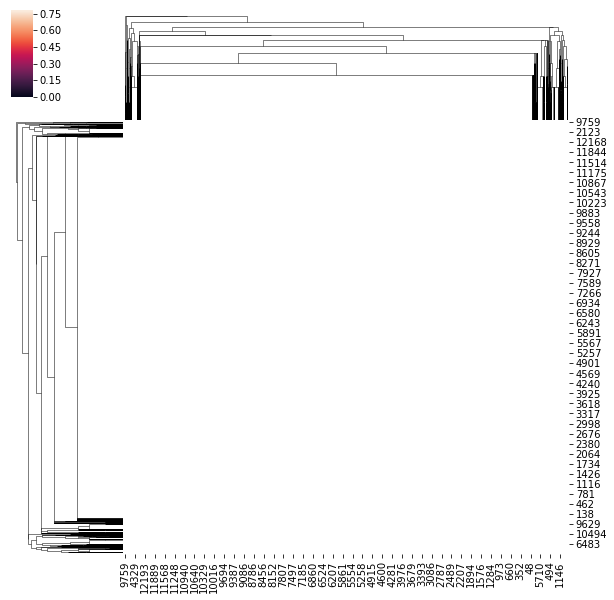

In [12]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced)

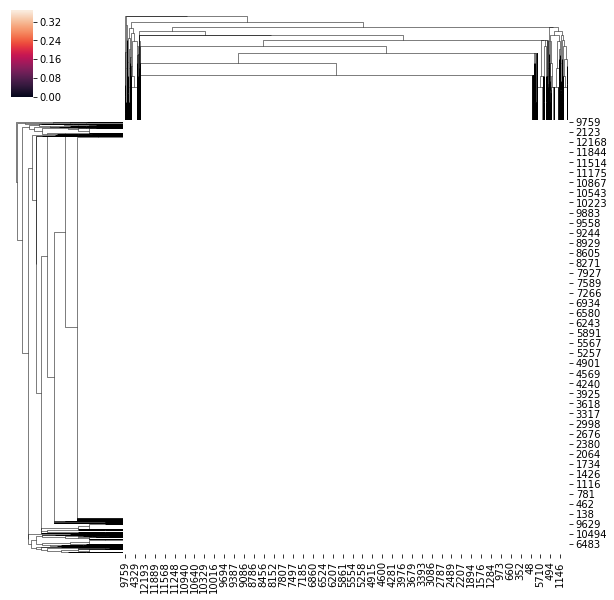

In [13]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

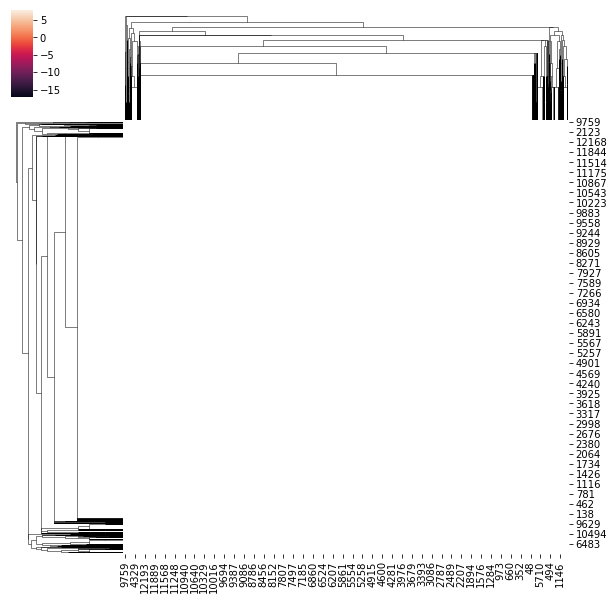

In [14]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

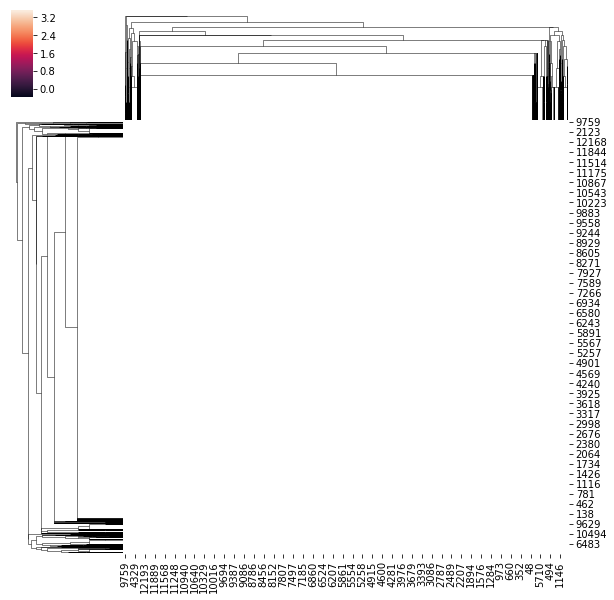

In [15]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)